# Assignment 1 - Introduction To Data Science

### Group - 2

#### Team Members

- Gaurav Singhal -    2023mt03187,
- Deepak Khandelwal - 2023mt03164,
- Debleena Goswami -  2023mt03099
- Palan Bhavin Bharatbhai


## Problem Statement
Device crashes can lead to significant downtime and loss of productivity, especially in environments where the device plays a critical role in daily operations. Predicting when a device might crash, based on various operational and environmental factors, can help mitigate these issues by enabling preemptive measures.
The EDA exercise aims to analyze the data considering specific parameters of a mobile device ultimately to understans the features better and enable to predict device crash when required


## The Mobile Crash Data
The data has been used from Kaggle (link Below). As a team we discussed the varios factors in a real world scenario which can lead to low performance of a mobile device. The below step enlists the columns and values of the factors like CPU Usage, APP Name (Running in the device), Memory Usage, Battery Level , Temperature , Disk Space and more. Data Contains different type of attributes ranging from Numerical, Binary to Categorical.

https://kaggle.com/datasets/3b3c13874b0aef147f9ef900dfad1a5cf88bf3235fe076630ffb14516d029c46

In [24]:
# Importing the required python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [25]:
#Load the data set
df = pd.read_csv('weatherHistory-v2.csv')
display(df.head())

,DATE,Precip_Type,Temperature_C,Apparent_Temperature_C,Humidity,Wind_Speed_kmph,Wind_Bearing_degrees,Visibility_km,Cloud_Cover,Pressure_millibars,SUMMARY
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly Cloudy
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly Cloudy
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Mostly Cloudy
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly Cloudy
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Mostly Cloudy


## Objective 1. Data Understanding

Establishing the Need for Data Understanding in Mobile Device Crash Prediction.

Mobile device data might have missing values, outliers, or noisy entries (e.g., extreme temperature readings, erroneous app usage counts). Understanding the data helps identify and rectify these issues to avoid biased predictions.
The below steps involves generating the summary statistics which includes COUNT, # of UNIQUE VALUE , # FREQUENCY, MIN, MAX values etc.
The steps intend to establish understanding on the spread of data, identify data imbalance if any and also process data in a way that can lead to meaningful results


### Objective 1.1. Generate Summary Statitics to understand Central Tendency and Dispersion in data.


In [26]:
# Summary statistics -
#This will do find mean and Quantiles finding central tendencies and dispersion
print("\nSummary Statistics:")
display(df.describe(include='all'))


Summary Statistics:


,DATE,Precip_Type,Temperature_C,Apparent_Temperature_C,Humidity,Wind_Speed_kmph,Wind_Bearing_degrees,Visibility_km,Cloud_Cover,Pressure_millibars,SUMMARY
count,94607,94090,94607.000000,94607.000000,94607.000000,94607.000000,94607.000000,94607.000000,94607.0,94607.000000,94607
unique,94583,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
top,2010-08-02 11:00:00.000 +0200,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partly Cloudy
freq,2,83498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31733
mean,NaN,NaN,11.948363,10.903570,0.736515,10.404663,186.717970,10.338093,0.0,1003.297805,NaN
std,NaN,NaN,9.578927,10.698098,0.195013,6.218956,107.316825,4.210418,0.0,117.189829,NaN
min,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,4.566667,2.338889,0.610000,5.651100,113.000000,8.259300,0.0,1012.020000,NaN
50%,NaN,NaN,12.061111,12.061111,0.790000,9.740500,180.000000,10.046400,0.0,1016.510000,NaN
75%,NaN,NaN,18.844444,18.844444,0.900000,13.974800,290.000000,14.876400,0.0,1021.150000,NaN


#### *Observation 1.1 from Summary Statics* -  
 1. Max for Batter_Level Attribute is going beyond 100 which is not meeting the conformity as max value for Battery_Level should be 100.

### Objective 1.2 Histogram Analysis -  
For Understanding the Distribution of Data we have used Histograms for the below reasons:
#### Normality Check:
Many machine learning models (like linear regression, logistic regression) assume that the input features are normally distributed. A histogram helps to visually assess whether the data follows a normal distribution or if it's skewed.
#### Skewness Detection:
Data might be left-skewed or right-skewed, indicating that most values are concentrated towards the lower or upper end of the range, respectively. This can impact how you preprocess the data (e.g., applying transformations like log or square root).

We have considered numeric and continuous variables like CPU Usage, Memory Usage, Battery Level, Disk Space for evaluation of the space the data is spread. This shall further help decide on the next steps of discretization, label encoding, normalization etc.

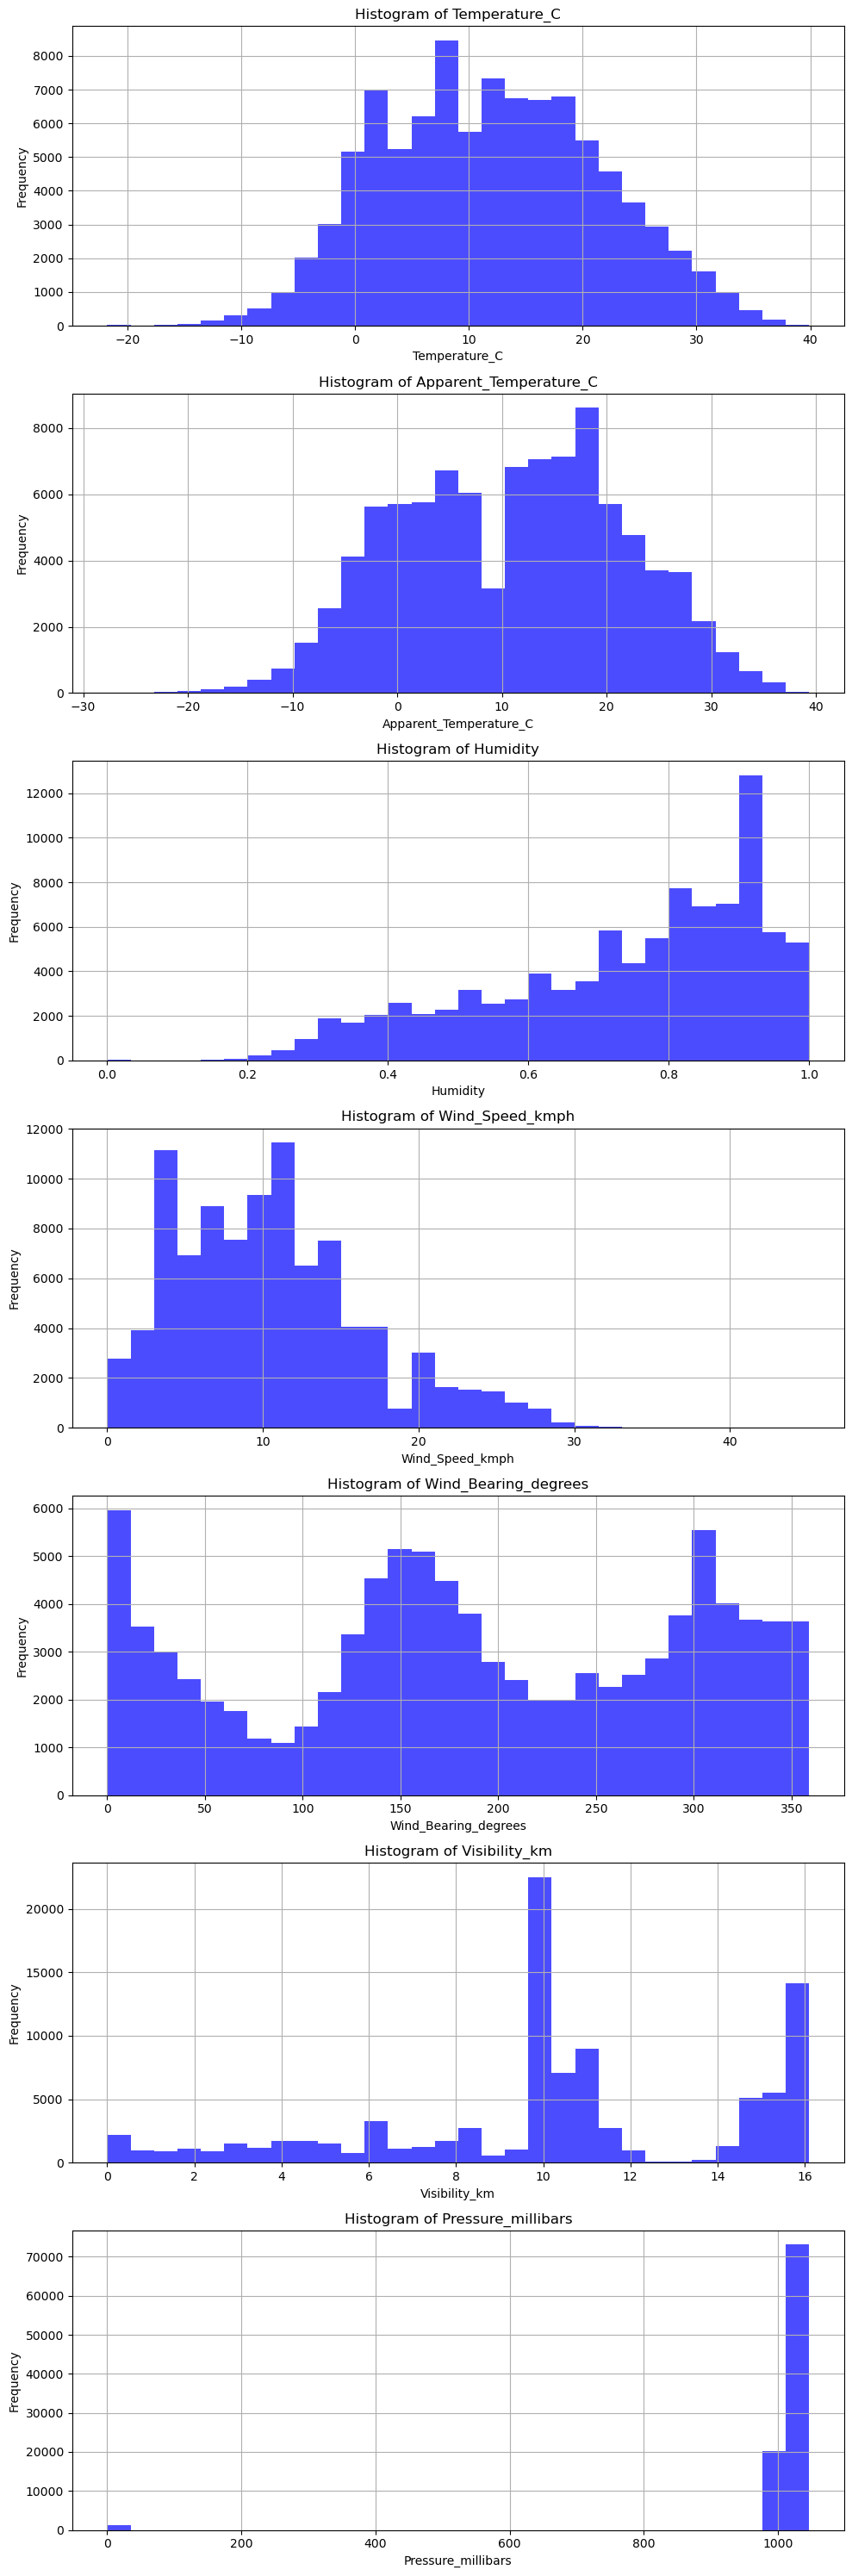

In [27]:
# Print Histograms for all numerical data (visualize data)
numeric_columns = df.select_dtypes(include='number').columns.tolist()
non_binary_non_discrete_numerical_columns = [col for col in numeric_columns if df[col].nunique() > 10]

fig, axes = plt.subplots(nrows=len(non_binary_non_discrete_numerical_columns), ncols=1, figsize=(10, 30))
# Iterate over numeric columns and create histograms
for i, column in enumerate(non_binary_non_discrete_numerical_columns):
    df[column].hist(ax=axes[i], bins=30, color='blue', alpha=0.7)
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Observation 1.2 - Histogram

Data is left skewed for Cpu_Usage and Temprature
For attributes Duration_Since_Last_charge, Network_Signal, Disk Space, Battery_Level is largely uniformally distributed.
Session_Time and Memory_Usage are uniformly modeled.


### Objective 1.3 - Box Plot To Identify Outliers

Outlier detection and measuring Central Tendency. Here are the details of the BOX PLOT and the inferencing of the outcome from the plot:

#### Central Tendency:
The box in the plot represents the interquartile range (IQR) and the line inside it indicates the median (50th percentile), providing a sense of where most data points cluster.For example median for CPU usage is approximately 61-65 and the IQR can be found between 50 and 70

#### Spread of the Data:
The length of the box shows the range of the middle 50% of the data (from the 25th percentile to the 75th percentile), while the "whiskers" extend to show the variability outside the upper and lower quartiles. The data for Temperature, CPU_Usage, Disk Space shows the outliers in the lower quartiles. For Memory Usage there are instances where the outliers are observed in the upper quartiles

#### Outliers:
Data points outside the whiskers are considered potential outliers. These are flagged with individual dots, helping to identify anomalies or rare occurrences in the dataset.

#### Skewness & Symmetry:
The position of the median line within the box and the length of the whiskers help assess the skewness of the data. If the median is not centered or one whisker is longer, the data may be skewed either left or right.

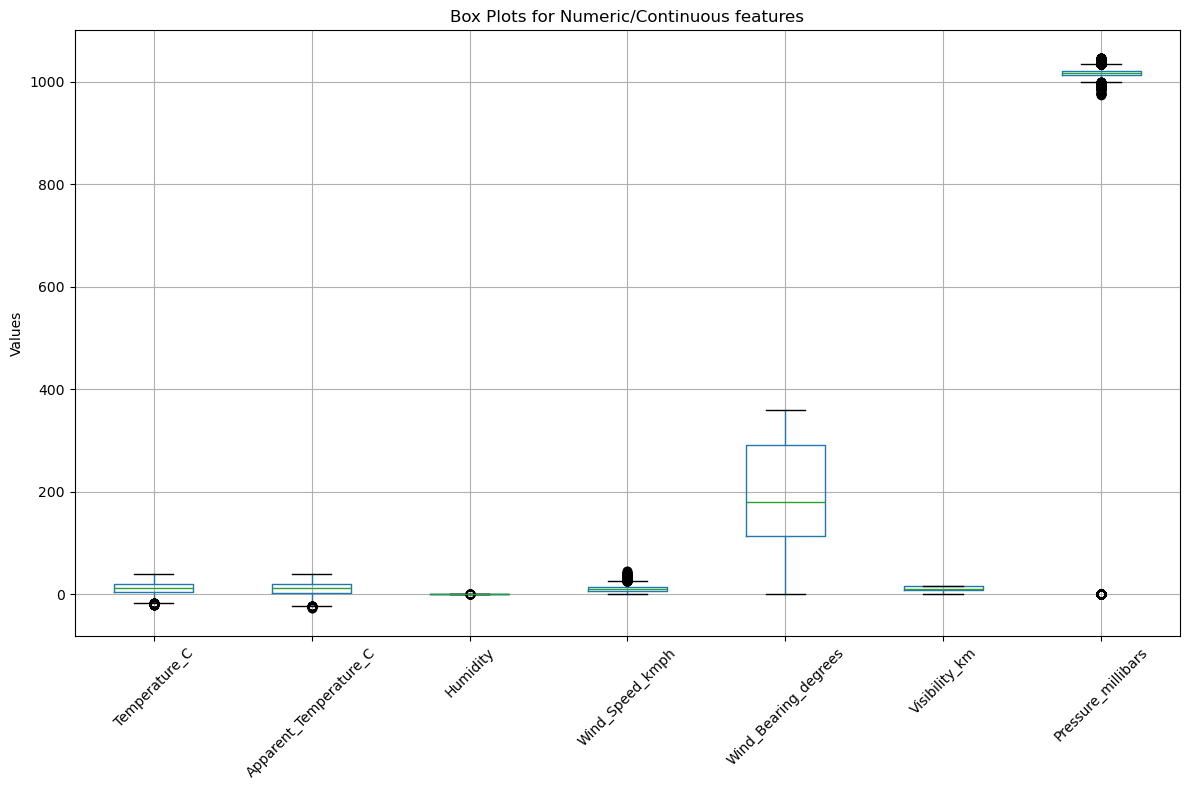

In [28]:
# Box Plot of numeric coloumns
import pandas as pd
import matplotlib.pyplot as plt

# Get numeric columns
numeric_columns = df.select_dtypes(include='number').columns.tolist()
non_binary_non_discrete_numerical_columns = [col for col in numeric_columns if df[col].nunique() > 10]
new_df = df[non_binary_non_discrete_numerical_columns]
fig, ax = plt.subplots(figsize=(12, 8))
# Create box plots
new_df.boxplot(ax=ax)
plt.title("Box Plots for Numeric/Continuous features")
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observation 1.3

Outlier is often defined as any point that falls outside 1.5 times the interquartile range (IQR) above the 75th percentile (upper quartile) or below the 25th percentile (lower quartile) in a box plot. In normal distributions, points that are more than three standard deviations away from the mean

In above box plot Cpu_Usage, Memory_Usage, Battery_Level, Temprature, Session_Time have outliers. While Disk_Space, Network_Signal, Duration_Since_Last_Recharge do not have any out lier.

### Objective 1.4 Looking for Missing Value

In [29]:
# Checking for missing values
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


DATE                        0
Precip_Type               517
Temperature_C               0
Apparent_Temperature_C      0
Humidity                    0
Wind_Speed_kmph             0
Wind_Bearing_degrees        0
Visibility_km               0
Cloud_Cover                 0
Pressure_millibars          0
SUMMARY                     0
dtype: int64

## Objective 2 - Data Quality Checks and Cleanup

From Above understanding of data we could see issue related to Conformity in Battery_Level, Missing Value for Column Cpu_Usage, Temprature, and Battery_Level, Also outliers for multiple attributes as noted in above observations.

### Objective 2.2 Identify outliers in all numeric coloumns and remove those records.



Temperature_C, Outliers Range[lb, ub] => [-16.850000000000072,  40.26111111111124] 

Apparent_Temperature_C, Outliers Range[lb, ub] => [-22.419444444444526,  43.602777777777916] 

Humidity, Outliers Range[lb, ub] => [0.17499999999999993,  1.335] 

Wind_Speed_kmph, Outliers Range[lb, ub] => [-6.83445,  26.46035] 

Wind_Bearing_degrees, Outliers Range[lb, ub] => [-152.5,  555.5] 

Visibility_km, Outliers Range[lb, ub] => [-1.6663500000000013,  24.80205] 

Pressure_millibars, Outliers Range[lb, ub] => [998.325,  1034.845] 


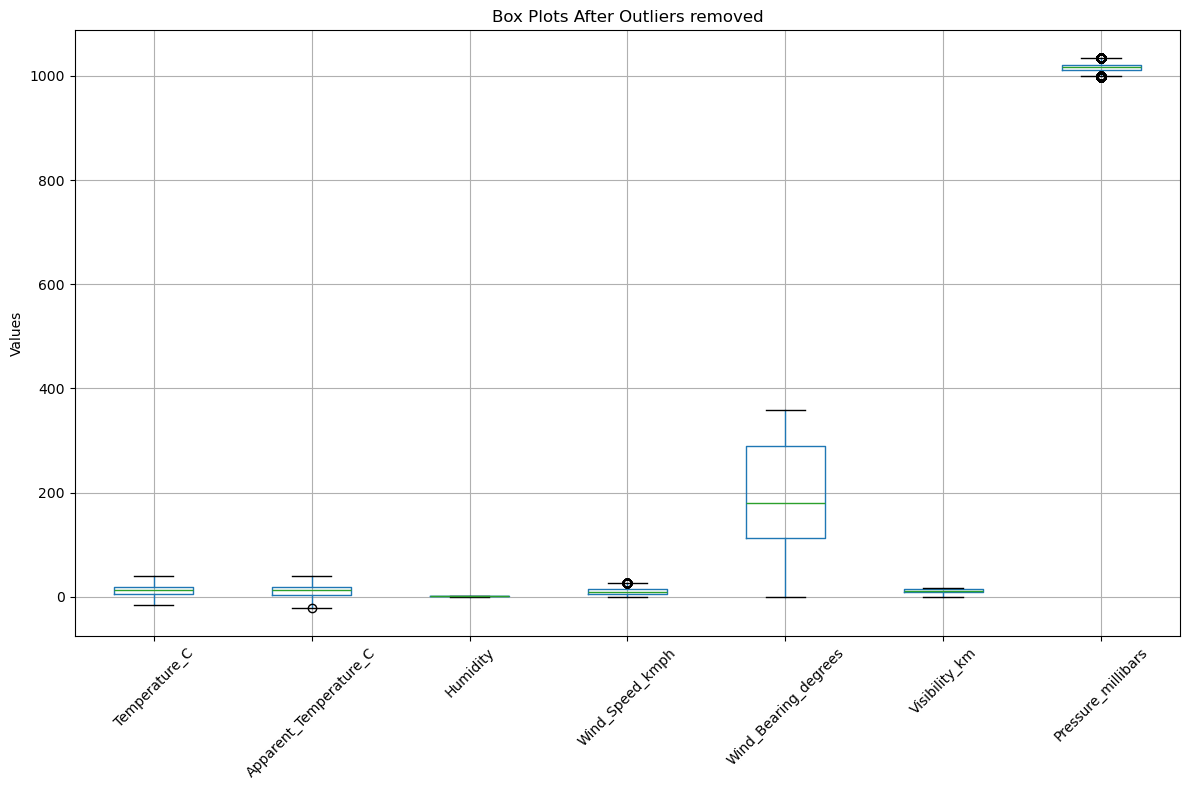

In [30]:
# Identify outliers in all numeric coloumns
new_df = df.copy()
numeric_cols = df.select_dtypes(include=np.number).columns
non_binary_non_discrete_numerical_columns = [col for col in numeric_cols if df[col].nunique() > 10]

for col in non_binary_non_discrete_numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"\n{col}, Outliers Range[lb, ub] => [{lower_bound},  {upper_bound}] ")
    print(f"=====================================================================")
    filtered_df = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    # removing outliers in this coloumn
    temp_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    new_df[col] = temp_df[col]

non_binary_non_discrete_numerical_columns = [col for col in numeric_cols if new_df[col].nunique() > 10]
non_binary_non_discrete_numerical_columns_df =  new_df[non_binary_non_discrete_numerical_columns]

fig, ax = plt.subplots(figsize=(12, 8))
# Create box plots
non_binary_non_discrete_numerical_columns_df.boxplot(ax=ax)
#new_df.boxplot(ax=ax)

plt.title("Box Plots After Outliers removed")
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

cleaned_data = new_df

### Objective 2.3 - Fill Missing values using mean, median and forward fill..

In [31]:
# Missing values
print("\nMissing Values Before Imputation:")
print(cleaned_data.isnull().sum())

cleaned_data['Temperature_C']=cleaned_data['Temperature_C'].fillna(cleaned_data['Temperature_C'].mean())
cleaned_data['Visibility_km']=cleaned_data['Visibility_km'].fillna(cleaned_data['Visibility_km'].mean())


cleaned_data['Apparent_Temperature_C']=cleaned_data['Apparent_Temperature_C'].fillna(cleaned_data['Apparent_Temperature_C'].median())
# Fill missing values with the mode (most frequent value)
cleaned_data['Precip_Type'].fillna(cleaned_data['Precip_Type'].mode()[0], inplace=True)

cleaned_data['Humidity']=cleaned_data['Humidity'].ffill()
cleaned_data['Wind_Speed_kmph']=cleaned_data['Wind_Speed_kmph'].fillna(cleaned_data['Wind_Speed_kmph'].median())
cleaned_data['Pressure_millibars']=cleaned_data['Pressure_millibars'].fillna(cleaned_data['Pressure_millibars'].median())


print("\nMissing Values after imputation:")
print(cleaned_data.isnull().sum())

## round to 2 decimal digit
cleaned_data = cleaned_data.round(2)
display(cleaned_data.head())


Missing Values Before Imputation:
DATE                         0
Precip_Type                517
Temperature_C               39
Apparent_Temperature_C      22
Humidity                    50
Wind_Speed_kmph           1467
Wind_Bearing_degrees         0
Visibility_km                0
Cloud_Cover                  0
Pressure_millibars        4286
SUMMARY                      0
dtype: int64

Missing Values after imputation:
DATE                      0
Precip_Type               0
Temperature_C             0
Apparent_Temperature_C    0
Humidity                  0
Wind_Speed_kmph           0
Wind_Bearing_degrees      0
Visibility_km             0
Cloud_Cover               0
Pressure_millibars        0
SUMMARY                   0
dtype: int64


/var/folders/8h/l0_2zqrs33q4811t9wfxzvv80000gn/T/ipykernel_6491/3436535073.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['Precip_Type'].fillna(cleaned_data['Precip_Type'].mode()[0], inplace=True)


,DATE,Precip_Type,Temperature_C,Apparent_Temperature_C,Humidity,Wind_Speed_kmph,Wind_Bearing_degrees,Visibility_km,Cloud_Cover,Pressure_millibars,SUMMARY
0,2006-04-01 00:00:00.000 +0200,rain,9.47,7.39,0.89,14.12,251.0,15.83,0.0,1015.13,Partly Cloudy
1,2006-04-01 01:00:00.000 +0200,rain,9.36,7.23,0.86,14.26,259.0,15.83,0.0,1015.63,Partly Cloudy
2,2006-04-01 02:00:00.000 +0200,rain,9.38,9.38,0.89,3.93,204.0,14.96,0.0,1015.94,Mostly Cloudy
3,2006-04-01 03:00:00.000 +0200,rain,8.29,5.94,0.83,14.10,269.0,15.83,0.0,1016.41,Partly Cloudy
4,2006-04-01 04:00:00.000 +0200,rain,8.76,6.98,0.83,11.04,259.0,15.83,0.0,1016.51,Mostly Cloudy


## Objective 3 - Data Preprocessing

Based on above understanding of data, this step will involve
1. Discritization of Battery_Level using Binning into 6 distinct ranges.
2. Label Encoding of Categorical Attributes to make all attributes numeric
3. Data Normalization

### Objective 3.2 Use Label Encoder to make all categorical attributes as numerical

There are 4 categorical attributes - App_Usage_Level, Device_Model, App_Name, Battery_Level. As  models only understand numerical values, its important to convert all categorical attributes to numerical.


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cleaned_data['Precip_Type']=le.fit_transform(cleaned_data['Precip_Type'])

cleaned_data['SUMMARY_ENCODED']=le.fit_transform(cleaned_data['SUMMARY'])


cleaned_data['DATE']=le.fit_transform(cleaned_data['DATE'])


# Validate if now all attributes are numerical
print("\nData Types:")
display(cleaned_data.dtypes)

display(cleaned_data.head())


Data Types:


DATE                        int64
Precip_Type                 int64
Temperature_C             float64
Apparent_Temperature_C    float64
Humidity                  float64
Wind_Speed_kmph           float64
Wind_Bearing_degrees      float64
Visibility_km             float64
Cloud_Cover               float64
Pressure_millibars        float64
SUMMARY                    object
SUMMARY_ENCODED             int64
dtype: object

,DATE,Precip_Type,Temperature_C,Apparent_Temperature_C,Humidity,Wind_Speed_kmph,Wind_Bearing_degrees,Visibility_km,Cloud_Cover,Pressure_millibars,SUMMARY,SUMMARY_ENCODED
0,2103,0,9.47,7.39,0.89,14.12,251.0,15.83,0.0,1015.13,Partly Cloudy,7
1,2104,0,9.36,7.23,0.86,14.26,259.0,15.83,0.0,1015.63,Partly Cloudy,7
2,2105,0,9.38,9.38,0.89,3.93,204.0,14.96,0.0,1015.94,Mostly Cloudy,5
3,2106,0,8.29,5.94,0.83,14.10,269.0,15.83,0.0,1016.41,Partly Cloudy,7
4,2107,0,8.76,6.98,0.83,11.04,259.0,15.83,0.0,1016.51,Mostly Cloudy,5


### Objective 3.3 - Normalize Numerical Data

Normalization brings all attributes in uniform data range. Many of the attributes in our data site like Disk_Space , Duration_Since_Last_Charge are in high ranges which can influence the outcome.
Data will be normalized in [0,1] range using Min-Max Normalization technique.

In [33]:
# Normalize Numerical Data
# copy the data
df_min_max_scaled = cleaned_data.copy()

# Loop through each numerical column
for column in df_min_max_scaled.select_dtypes(include=['int64', 'float64']).columns:
    min_val = df_min_max_scaled[column].min()
    max_val = df_min_max_scaled[column].max()
    df_min_max_scaled[column] = (df_min_max_scaled[column] - min_val) / (max_val - min_val)

# Display the normalized DataFrame
print("\nNormalized DataFrame:")
display(df_min_max_scaled)


Normalized DataFrame:


,DATE,Precip_Type,Temperature_C,Apparent_Temperature_C,Humidity,Wind_Speed_kmph,Wind_Bearing_degrees,Visibility_km,Cloud_Cover,Pressure_millibars,SUMMARY,SUMMARY_ENCODED
0,0.022235,0.0,0.462381,0.482675,0.865854,0.533837,0.699164,0.983230,NaN,0.460148,Partly Cloudy,0.777778
1,0.022245,0.0,0.460438,0.480084,0.829268,0.539130,0.721448,0.983230,NaN,0.473843,Partly Cloudy,0.777778
2,0.022256,0.0,0.460791,0.514896,0.865854,0.148582,0.568245,0.929193,NaN,0.482334,Mostly Cloudy,0.555556
3,0.022266,0.0,0.441540,0.459197,0.792683,0.533081,0.749304,0.983230,NaN,0.495207,Partly Cloudy,0.777778
4,0.022277,0.0,0.449841,0.476036,0.792683,0.417391,0.721448,0.983230,NaN,0.497946,Mostly Cloudy,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...
94602,0.971781,0.0,0.754680,0.784326,0.304878,0.415879,0.086351,1.000000,NaN,0.439058,Partly Cloudy,0.777778
94603,0.971792,0.0,0.729248,0.761010,0.365854,0.381474,0.055710,0.965839,NaN,0.460970,Partly Cloudy,0.777778
94604,0.971802,0.0,0.684387,0.719883,0.463415,0.339509,0.083565,1.000000,NaN,0.474664,Partly Cloudy,0.777778
94605,0.971813,0.0,0.675203,0.711464,0.512195,0.398110,0.055710,1.000000,NaN,0.482608,Partly Cloudy,0.777778


 ## Objective 4 - Feature Selection

 Implement feature selection techniques and display the top 5 features that contribute the most to the
classification task.

 ### Objective 4.1 - Using Pearson Correlation to find correlation between different attributes as well as with label attribute to do Fetaure Selection.

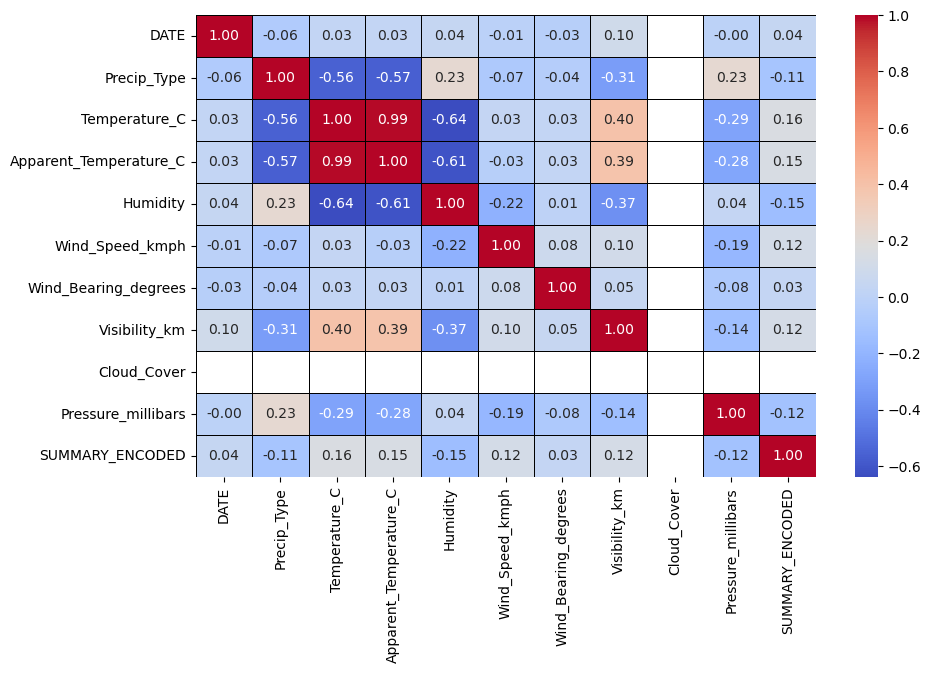

In [34]:
from tkinter import TRUE
# Correlation Matrix - Internally uses Pearson Correlation
#cor = df_min_max_scaled.corr()

# Select only numeric columns (integers, floats) from the DataFrame
df_numeric = df_min_max_scaled.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns only
cor = df_numeric.corr()

# Plotting Heatmap
plt.figure(figsize = (10,6))
#sns.heatmap(cor, annot=True)
sns.heatmap(
    cor,
    annot=True,              # Annotate cells with their values
    fmt=".2f",              # Format for annotation
    cmap='coolwarm',        # Color map
    cbar=True,              # Show color bar
    linewidths=.5,          # Lines between cells
    linecolor='black',       # Color of the lines
    square=False,            # Make cells square-shaped
    xticklabels=True,       # Show x-tick labels
    yticklabels=True        # Show y-tick labels
)
plt.show()

 #### *Observation 4.1*

Above Heat Map shows the correlation between multiple attributes. Below are the observations.

##### 1. Bettery_Level and Duration_Since_Last_charge are highly Negatively Correlated with each other. It means one feature is redundent and can be removed.
##### 2. CPU_Usage and Temprature are positively correlated , means when Cpu_Usage Increases, Temprature also increases.
##### 3. Attribute Cpu_Usage, Battery_Level, Temprature, Num_App_Crash, Disk_Space have correlation with Crash_Label and directly impacts it.

 ###### Generating Scatter Plot for Cpu_usage and Temprature to visulatize scatter plot and finding the standard deviation of values

94607
94607
Pearson correlation: -0.640


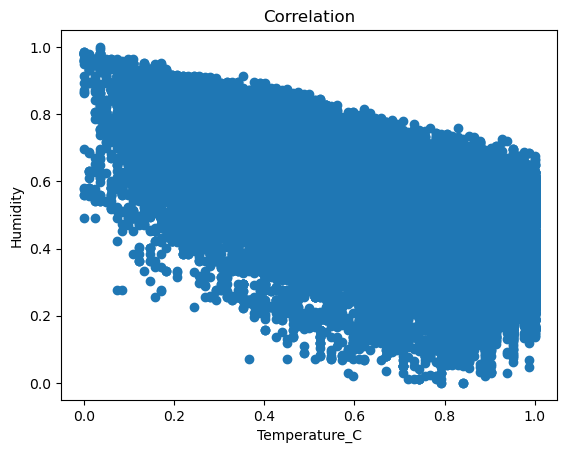

In [35]:
from scipy.stats import pearsonr
# Convert dataframe into series
list1 = df_min_max_scaled['Humidity']
list2 = df_min_max_scaled['Temperature_C']
print(list1.size)
print(list2.size)

# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearson correlation: %.3f' % corr)

# Pearson correlation: 0.205 (Moderate Positive correlation)
# Interpretaton:
# As the CPU usage of the device increases, heat also increases

# Draw a Plot of the relationship
# 'CPU' on the X Axis and 'Memory' on the Y axis
from matplotlib import pyplot
pyplot.scatter(list1, list2)
plt.title("Correlation")
plt.ylabel('Humidity')
plt.xlabel('Temperature_C')
pyplot.show()

 ### Objective 4.2

1.  Removing Cloud_Cover as it is has no correlation with other attributes
2. Removing Apparent_Temperature_C as that is redundent to Temprature_C
3. Wind_Bearing_degrees has negilgible impact on any other column
4. DATE has negilgible impact on any other column

In [36]:
# Drop redundenent, or irrelevent features

data_cleaned = df_min_max_scaled.drop(columns=['Apparent_Temperature_C'])
data_cleaned = data_cleaned.drop(columns=['Cloud_Cover'])
data_cleaned = data_cleaned.drop(columns=['Wind_Bearing_degrees'])
data_cleaned = data_cleaned.drop(columns=['DATE'])
data_cleaned = data_cleaned.drop(columns=['SUMMARY_ENCODED'])

display(data_cleaned.dtypes)


Precip_Type           float64
Temperature_C         float64
Humidity              float64
Wind_Speed_kmph       float64
Visibility_km         float64
Pressure_millibars    float64
SUMMARY                object
dtype: object

##### New Code Added Here - Bhavin

#### Decision Tree Implementation   

1. Split the Cleaned Dataframe into Train and Test Dataset
2. Implement a decision tree classifier using scikit-learn's DecisionTreeClassifier class.
3. Train the decision tree classifier on the training dataset.

In [37]:
#1. Split the Cleaned Dataframe into Train and Test Dataset

# Split the data into features (X) and target (y)
X = data_cleaned.drop('SUMMARY', axis=1)  # Features (independent variables)
y = data_cleaned['SUMMARY']               # Target (dependent variable)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Show the split data
print("Training Features:\n", X_train)
print("Test Features:\n", X_test)
print("Training Labels:\n", y_train)
print("Test Labels:\n", y_test)

Training Features:
        Precip_Type  Temperature_C  Humidity  Wind_Speed_kmph  Visibility_km  \
35492          0.0       0.785941  0.390244         0.419282       0.642857   
10629          1.0       0.207171  0.817073         0.348960       0.160870   
51349          0.0       0.472801  0.792683         0.134972       0.983230   
85776          0.0       0.823737  0.304878         0.260491       1.000000   
9844           0.0       0.843695  0.073171         0.352363       0.619876   
...            ...            ...       ...              ...            ...   
6265           0.0       0.598552  0.548780         0.309641       0.696273   
54886          0.0       0.314730  0.500000         0.486957       0.619876   
76820          0.0       0.540092  0.951220         0.121739       0.608696   
860            0.0       0.617273  0.768293         0.236295       0.983230   
15795          0.0       0.450371  0.658537         0.751607       0.691304   

       Pressure_millibars  
354

In [38]:
##2. Implement a decision tree classifier using scikit-learn's DecisionTreeClassifier class.
##3. Train the decision tree classifier on the training dataset.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

print("Decision Tree Model Classified")


Decision Tree Model Classified


##### Model Evaluation

1. Evaluate the performance of the trained decision tree classifier using appropriate evaluation
metrics such as accuracy, precision, recall, F1-score, and confusion matrix. Interpret the findings
from each of the evaluation metrics.
2. Visualize the decision tree using graphviz or any other suitable visualization tool/library.

In [23]:
# Predict the target values using the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.48


/opt/anaconda3/envs/bitsIDP/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/bitsIDP/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/bitsIDP/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/a

Classification Report:
                precision    recall  f1-score   support

       Breezy       0.21      0.21      0.21        19
        Clear       0.31      0.32      0.31      3295
      Drizzle       0.00      0.00      0.00        11
          Dry       0.00      0.00      0.00         7
        Foggy       1.00      1.00      1.00      2159
Mostly Cloudy       0.42      0.41      0.41      8428
     Overcast       0.44      0.46      0.45      4966
Partly Cloudy       0.49      0.48      0.49      9495
         Rain       0.00      0.00      0.00         0
        Windy       0.00      0.00      0.00         3

     accuracy                           0.48     28383
    macro avg       0.29      0.29      0.29     28383
 weighted avg       0.48      0.48      0.48     28383

Confusion Matrix:
 [[   4    5    0    0    0    1    3    6    0    0]
 [   4 1043    2    7    3  709  376 1150    1    0]
 [   0    0    0    0    1    3    4    3    0    0]
 [   0    2    0    0    

/opt/anaconda3/envs/bitsIDP/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/bitsIDP/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### End of New Code - Bhavin

 ### Objective 4.3

1. Finding top 5 features that contribute the most to the classification task.

   Though it is clear from Heatmap what features are important and impacting the Crash_Label, We will be using FeatureImportance mechanism to visualize it.

In [14]:
from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()



In [16]:
## SKIP this one

from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()

X = data_cleaned.iloc[:,[0,1,2,3,4,5]]
Y = data_cleaned.iloc[:,[6]]

# fit the model
model.fit(X,Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	#print('Feature: %0d, Score: %.5f' % (i,v))
    print(f'Feature: {X.columns[i]}, Score: {v:.5f}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance")
plt.ylabel('Importance towards Daily Summary')
plt.xlabel('Features')
plt.show()

/opt/anaconda3/envs/bitsIDP/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ValueError: could not convert string to float: 'Partly Cloudy'

 #### *Observation 4.3*

1. Top 5 Features contributing most in descending order -
   - Visibility_km
   - Temprature
   - Pressure_millibars
   - Wind_Speed_kmph
   - SUMMARY


   Thankyou !
   
   
   
     

In [ ]:
# A machine learning project uses a training set to train the model,
# and a testing set to test the model.
# Both training set and testing set are taken from the available dataset.
# The given dataset is split into two  parts - training and testing set, in a ratio.

# A machine learning project uses a training set to train the model,
# and a testing set to test the model.
# Both training set and testing set are taken from the available dataset.
# The given dataset is split into two  parts - training and testing set, in a ratio.

from sklearn.model_selection import train_test_split

# copy all columns excluding last column
X = data_cleaned.loc[:, data_cleaned.columns != 'SUMMARY']

# copy the last column only
Y = data_cleaned['SUMMARY']

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, stratify=Y, test_size= 0.3)

# The dataset is split into two - training data and testing data.
# The ratio of split is given by the parameter test_size.
# In this example test_size=0.3 says that 30 % of  observations are used for testing
# and rest 70 % observations are used for training.

# randam_state is the seed for the random number generator.

In [ ]:
# The model we are choosing is a Decision Tree model.
from sklearn.tree import DecisionTreeClassifier
# Create the model
model = DecisionTreeClassifier()

In [ ]:
# Train the model

model.fit(X_train, Y_train)

# This prints the summary of the model that has been used.
# The defualt parameter values are also listed.

DecisionTreeClassifier()

In [ ]:
# Predict the values for testing set

Y_predict = model.predict(X_test)

In [ ]:
# To visualize this model, the feature names and class names are essential.

# extract the feature names
feature_names = list(data_cleaned.columns.values)

# drop the last column name
feature_names = feature_names[:-1]


In [ ]:
# extact the class names
class_int = data_cleaned['SUMMARY'].unique().tolist()

class_names = ['Breezy', 'Clear', 'Drizzle', 'Dry', 'Foggy', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Rain', 'Windy']

# map the class names to the class number as specified in the dataset

dictionary = dict(zip(class_names, class_int))

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0165925 to fit



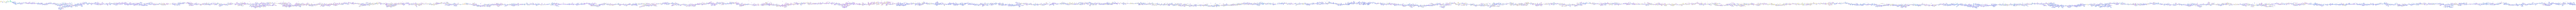

In [ ]:
# Vizualize the tree

!pip install graphviz
!pip install six


# set the path to graphviz
import os  # Windows OS
#os.environ["PATH"] += os.pathsep + 'C:\\Anaconda3\\Library\\bin\\graphviz' # Windows OS


# import the necessary libraries

from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# may need to install
# pip install pydotplus

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                feature_names = feature_names,
                class_names = class_names,
                proportion = False, precision = 2,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())